/Users/hunterblock/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

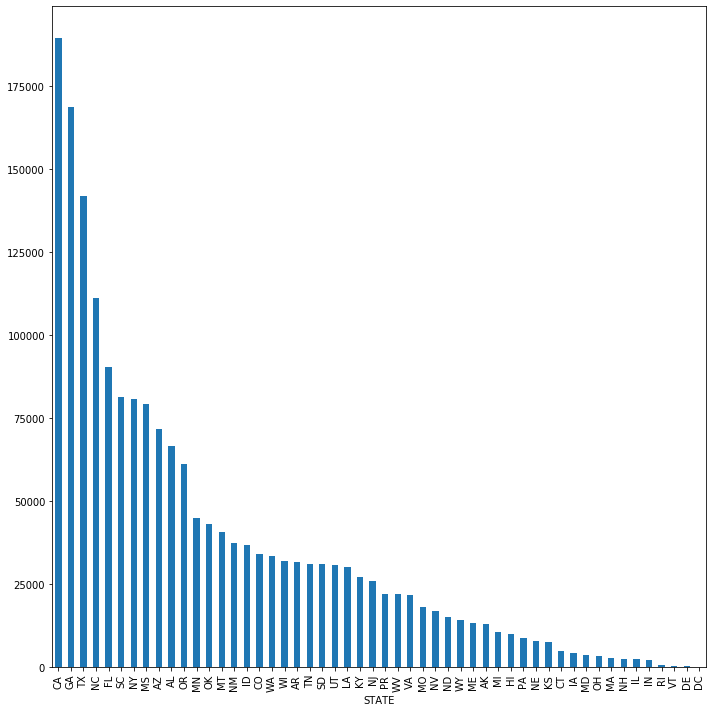

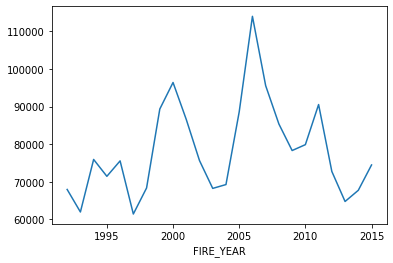

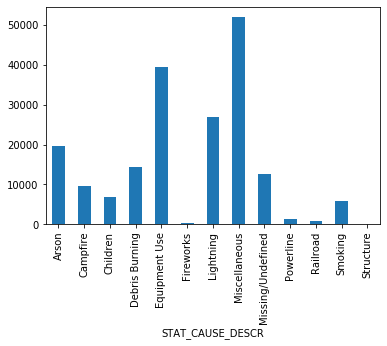

In [3]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

CSVREADER = pd.read_csv("fire_data.csv")
CSVREADER.info()

#converting dates to Gegorian format 
CSVREADER["DISCOVERY_DATE"] = pd.to_datetime(CSVREADER['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
CSVREADER["CONT_DATE"] = pd.to_datetime(CSVREADER['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
CSVREADER["LENGTH_OF_BURN"] = CSVREADER["CONT_DATE"] - CSVREADER["DISCOVERY_DATE"]

DATES = CSVREADER[["STATE","COUNTY", "STAT_CAUSE_DESCR","FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "CONT_DATE","CONT_DOY", "LENGTH_OF_BURN"]]

TOTAL_FIRES_STATE= pd.DataFrame(DATES.groupby("STATE")["FIRE_YEAR"].count().sort_values(ascending=False))
PLOT = TOTAL_FIRES_STATE.plot(kind = "bar", figsize = (10,10), legend = None)
plt.tight_layout()

YEAR = pd.DataFrame(DATES.groupby("FIRE_YEAR")["STATE"].count())
plot2 = YEAR.plot(kind = "line", legend =None)

CALIFORNIA = DATES[DATES["STATE"]== "CA"]
CALI_CAUSES = pd.DataFrame(CALIFORNIA.groupby("STAT_CAUSE_DESCR")["FIRE_YEAR"].count())
COUNT = CALI_CAUSES[["FIRE_YEAR"]]
CALI_CAUSES.plot(kind = "bar", legend = None)
plt.ylim= (0, COUNT +1000)



In [26]:
CSVREADER_FIRE_SIZE_F = (CSVREADER[CSVREADER["FIRE_SIZE_CLASS"]=="F"]) 
CSVREADER_FIRE_SIZE_F

CSVREADER_FIRE_SIZE_G = (CSVREADER[CSVREADER["FIRE_SIZE_CLASS"]=="G"]) 
CSVREADER_FIRE_SIZE_G

f_g_fires = CSVREADER_FIRE_SIZE_F.append(CSVREADER_FIRE_SIZE_F, CSVREADER_FIRE_SIZE_G)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().